In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [10]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:07<00:00, 216MB/s]
100% 1.06G/1.06G [00:07<00:00, 151MB/s]


In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [13]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
# Normalize the data
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [21]:
# Create CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 80s 127ms/step - loss: 0.4269 - accuracy: 0.8041 - val_loss: 0.5555 - val_accuracy: 0.7142
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3668 - accuracy: 0.8365 - val_loss: 0.4857 - val_accuracy: 0.7588
Epoch 3/10
625/625 [==============================] - 70s 111ms/step - loss: 0.2921 - accuracy: 0.8756 - val_loss: 0.4896 - val_accuracy: 0.7920
Epoch 4/10
625/625 [==============================] - 69s 111ms/step - loss: 0.2072 - accuracy: 0.9179 - val_loss: 0.5914 - val_accuracy: 0.7914
Epoch 5/10
625/625 [==============================] - 69s 109ms/step - loss: 0.1433 - accuracy: 0.9480 - val_loss: 0.7791 - val_accuracy: 0.7492
Epoch 6/10
625/625 [==============================] - 70s 112ms/step - loss: 0.1002 - accuracy: 0.9646 - val_loss: 0.8221 - val_accuracy: 0.8046
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.0769 - accuracy: 0.9748 - val_loss: 0.6477 - val_ac

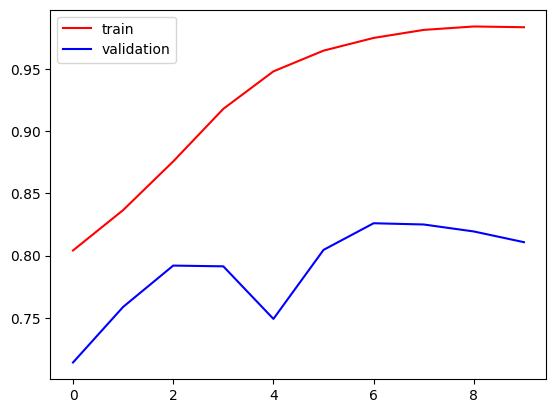

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

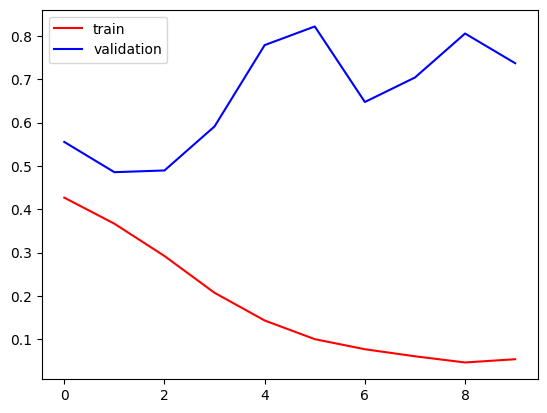

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [28]:
import cv2
test_img = cv2.imread('/content/image.jpeg')

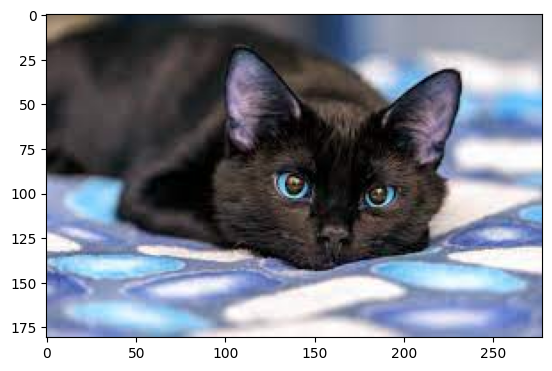

In [29]:
plt.imshow(test_img)

In [30]:
test_img.shape

(181, 278, 3)

In [31]:
test_img = cv2.resize(test_img,(256,256))

In [32]:
test_input = test_img.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 [==============================] - 0s 394ms/step


array([[0.]], dtype=float32)

In [ ]:
# Here 0 means Cat and 1 means Dog